# Requirements

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Newton-Raphson method

You want to determine the root of a function $f$, its derivative is $f'$.  Choose an arbitrary start point $x_0$.  In that point, compute the tangent.  Its slope is given by $f'(x_0)$ and it touches the function $f$ in the point $(x_0, f(x_0))$, hence the intercept is given by:
$$
f(x_0) = f'(x_0) x_0 + b
$$
or
$$
b = f(x_0) - f'(x_0) x_0
$$
So the tangent's equation is
$$
y = f'(x_0) (x - x_0) + f(x_0)
$$
It will intercept the $x$-axis in:
$$
x = x_0 - \frac{f(x_0)}{f'(x_0)}
$$
Now use that value as the new starting point and repeat until $f(x_0) < \epsilon$ for some given toleratoe $\epsilon$.

In [24]:
def newton_raphson(f, f_prime, x0, tol=1e-5, max_steps=20, is_verbose=False):
    n = 0
    while not math.isclose(0.0, abs(f(x0)), abs_tol=tol):
        x0 -= f(x0)/f_prime(x0)
        n += 1
        if is_verbose:
            print(f'step {n}: {x0}')
        if n > max_steps:
            break
    return x0, f(x0)

# Example

Considure a cubic function and its derivative.

In [4]:
f = lambda x: 3.0*x**3 - 4.0*x**2 - 1.5*x + 0.5
f_prime = lambda x: 9.0*x**2 - 8.0*x - 1.5

Visualize the function.

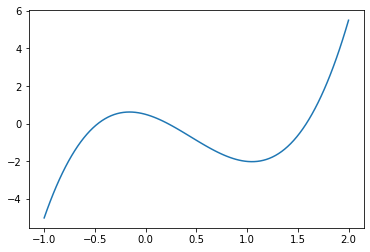

In [20]:
x = np.linspace(-1.0, 2.0, 101)
_ = plt.plot(x, f(x))

Depending on the starting point $x_0$, the algorithm will find one of the three roots of this equations.

In [25]:
newton_raphson(f, f_prime, x0=2.0, is_verbose=True)

step 1: 1.7027027027027026
step 2: 1.5971012458578624
step 3: 1.5829589308650354
step 4: 1.5827125896614378


(1.5827125896614378, 6.217615564629853e-07)

In [26]:
newton_raphson(f, f_prime, x0=-1.0, is_verbose=True)

step 1: -0.6774193548387097
step 2: -0.5218733905892606
step 3: -0.47642083466961965
step 4: -0.47235909847454965
step 5: -0.4723272512570019


(-0.4723272512570019, -8.368676196468527e-09)

In [27]:
newton_raphson(f, f_prime, x0=-0.0, is_verbose=True)

step 1: 0.3333333333333333
step 2: 0.22807017543859645
step 3: 0.22296609472606682
step 4: 0.22294806737330722


(0.22294806737330722, -6.478128034004271e-10)

In each case, the root is found in very few steps with excellent accuracy.

# Complex values

The Newton-Raphson model works equally well in the complex plane.

In [28]:
newton_raphson(f, f_prime, x0=1.7 - 0.5j, is_verbose=True)

step 1: (1.4892467940495033-0.188396215616699j)
step 2: (1.5304826035597727+0.029904121819097934j)
step 3: (1.5849254768371337-0.004364155910204122j)
step 4: (1.5826954871977128-2.3644874071061805e-05j)
step 5: (1.5827125151641575+9.840732737930282e-10j)


((1.5827125151641575+9.840732737930282e-10j),
 (-2.757399641950542e-09+8.24959453139763e-09j))

In [29]:
def newton_raphson_path(f, f_prime, x0, tol=1e-5, max_steps=20):
    x_values = [x0]
    n = 0
    while not math.isclose(0.0, abs(f(x0)), abs_tol=tol):
        x0 -= f(x0)/f_prime(x0)
        x_values.append(x0)
        n += 1
        if n > max_steps:
            break
    return x_values

In [33]:
def plot_newton_raphson_path(x_values):
    x = np.array(list(map(lambda x: x.real, x_values)))
    y = np.array(list(map(lambda x: x.imag, x_values)))
    _ = plt.plot(x, y)

In [31]:
x_values = newton_raphson_path(f, f_prime, 2.0 + 0.3j)

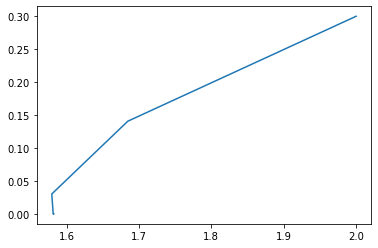

In [34]:
plot_newton_raphson_path(x_values)

# Fractals

If we label a point with a color according to the root Newton-Raphson will find when we use it as a starting point, we get an interesting fractal.

We define a function that assigns values that will be distinct in a heatmap.

In [65]:
def label(x):
    fixpoints = {
        0.223: -1.0,
        1.583: 0.0,
        -0.472: 1.0,
    }
    for fixpoint, color in fixpoints.items():
        if math.isclose(fixpoint, x.real, abs_tol=0.1):
            return color
    print(f'can not label {x}')

Now we can consider the points in the complex plane so that $-2 < real(z) < 2$ and $-2 < imag(z) < 2$.

In [71]:
re = np.linspace(-2.0, 2.0, 1001)
im = np.linspace(-2.0, 2.0, 1001)
Re, Im = np.meshgrid(re, im)
z = Re + Im*1.0j

In [72]:
def compute_label(z):
    image = np.empty(z.shape)
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):
            image[i, j] = label(newton_raphson(f, f_prime, z[i, j])[0])
    return image

In [73]:
image = compute_label(z)

can not label (1.8648396090944805-0.37253645201815255j)
can not label (0.4996230653803892+0.35542421552894127j)
can not label (1.9990642363359163+1.0562189970591902j)
can not label (0.06849956882581958-0.03665243434974319j)
can not label (0.06849956882581958+0.03665243434974319j)
can not label (1.9990642363359163-1.0562189970591902j)
can not label (0.4996230654022482-0.3554242154217716j)
can not label (1.8648396092209354+0.372536452019261j)


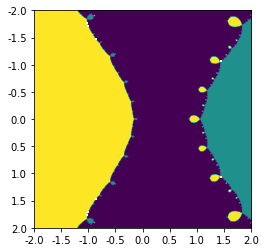

In [82]:
_ = plt.imshow(image)
_ = plt.xticks(np.linspace(0, image.shape[0], 9), np.linspace(-2.0, 2.0, 9))
_ = plt.yticks(np.linspace(0, image.shape[1], 9), np.linspace(-2.0, 2.0, 9))

In [83]:
def plot_fractal(f, f_prime, x_min, x_max, y_min, y_max, steps):
    re = np.linspace(x_min, x_max, steps)
    im = np.linspace(y_min, y_max, steps)
    Re, Im = np.meshgrid(re, im)
    z = Re + Im*1.0j
    image = np.empty(z.shape)
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):
            image[i, j] = label(newton_raphson(f, f_prime, z[i, j])[0])
    image = compute_label(z)
    _ = plt.imshow(image)
    _ = plt.xticks(np.linspace(0, image.shape[0], 9), np.linspace(x_min, x_max, 9))
    _ = plt.yticks(np.linspace(0, image.shape[1], 9), np.linspace(y_min, y_max, 9))

can not label (1.9990642363359163+1.0562189970591902j)
can not label (1.9990642363359163-1.0562189970591902j)
can not label (1.9990642363359163+1.0562189970591902j)
can not label (1.9990642363359163-1.0562189970591902j)


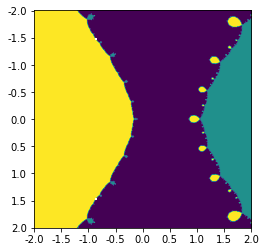

In [88]:
plot_fractal(f, f_prime, -2.0, 2.0, -2.0, 2.0, 501)

can not label (-0.06683231774682832-0.18170529001509694j)
can not label (2.0521267109704975-0.004925884755073853j)
can not label (2.0521267109604255+0.0049258847519130615j)
can not label (-0.06683231774682832+0.18170529001509694j)
can not label (-0.06683231774682832-0.18170529001509694j)
can not label (2.0521267109704975-0.004925884755073853j)
can not label (2.0521267109604255+0.0049258847519130615j)
can not label (-0.06683231774682832+0.18170529001509694j)


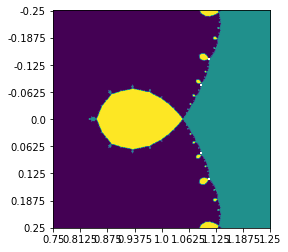

In [87]:
plot_fractal(f, f_prime, 0.75, 1.25, -0.25, 0.25, 501)

In [98]:
f = lambda x: (x - 1.0 - 1.0j)*(x + 1.5j)*(x - 1.0j)
f_prime = lambda x: (x + 1.5j)*(x - 1.0j) + \
                    (x - 1.0 - 1.0j)*(x - 1.0j) + \
                    (x - 1.0 - 1.0j)*(x + 1.5j)

In [103]:
def label(x):
    fixpoints = {
        1.0j: -1.0,
        1.0 + 1.0j: 0.0,
        -1.5j: 1.0,
    }
    for fixpoint, color in fixpoints.items():
        if math.isclose(fixpoint.real, x.real, abs_tol=0.1) and \
           math.isclose(fixpoint.imag, x.imag, abs_tol=0.1):
            return color
    print(f'can not label {x}')

can not label (1.0764052700328621+0.8774530854397731j)
can not label (0.3096901416850126+1.0506628190909084j)
can not label (2.20334391833127+0.6688124234703527j)
can not label (-3.5938962453627044+0.4857839724874602j)
can not label (1.121985484615377+1.314933022740644j)
can not label (-0.3150107304885432-0.10312544948397678j)
can not label (0.24920963893249076+1.3341492481654453j)
can not label (0.946104487351297+1.1747508336676242j)
can not label (1.0764052700328621+0.8774530854397731j)
can not label (0.3096901416850126+1.0506628190909084j)
can not label (2.20334391833127+0.6688124234703527j)
can not label (-3.5938962453627044+0.4857839724874602j)
can not label (1.121985484615377+1.314933022740644j)
can not label (-0.3150107304885432-0.10312544948397678j)
can not label (0.24920963893249076+1.3341492481654453j)
can not label (0.946104487351297+1.1747508336676242j)


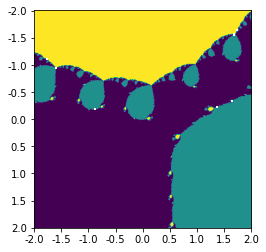

In [104]:
plot_fractal(f, f_prime, -2.0, 2.0, -2.0, 2.0, 501)